# PYTHON Implementstion

Problem Statement:


 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:/Users/ankus/Downloads/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.shape

(891, 12)

In [4]:
#now remove the unwanted column from the dataset
data=data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)
data
                

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Sex"]=le.fit_transform(data["Sex"])
data["Embarked"]=le.fit_transform(data["Embarked"])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [6]:
#checking the null values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [7]:
#removing null values
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mean())    #use mode as the given column is categorical

In [8]:
#checking the null values
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

so now the null values are removed

In [9]:
#check the data description
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


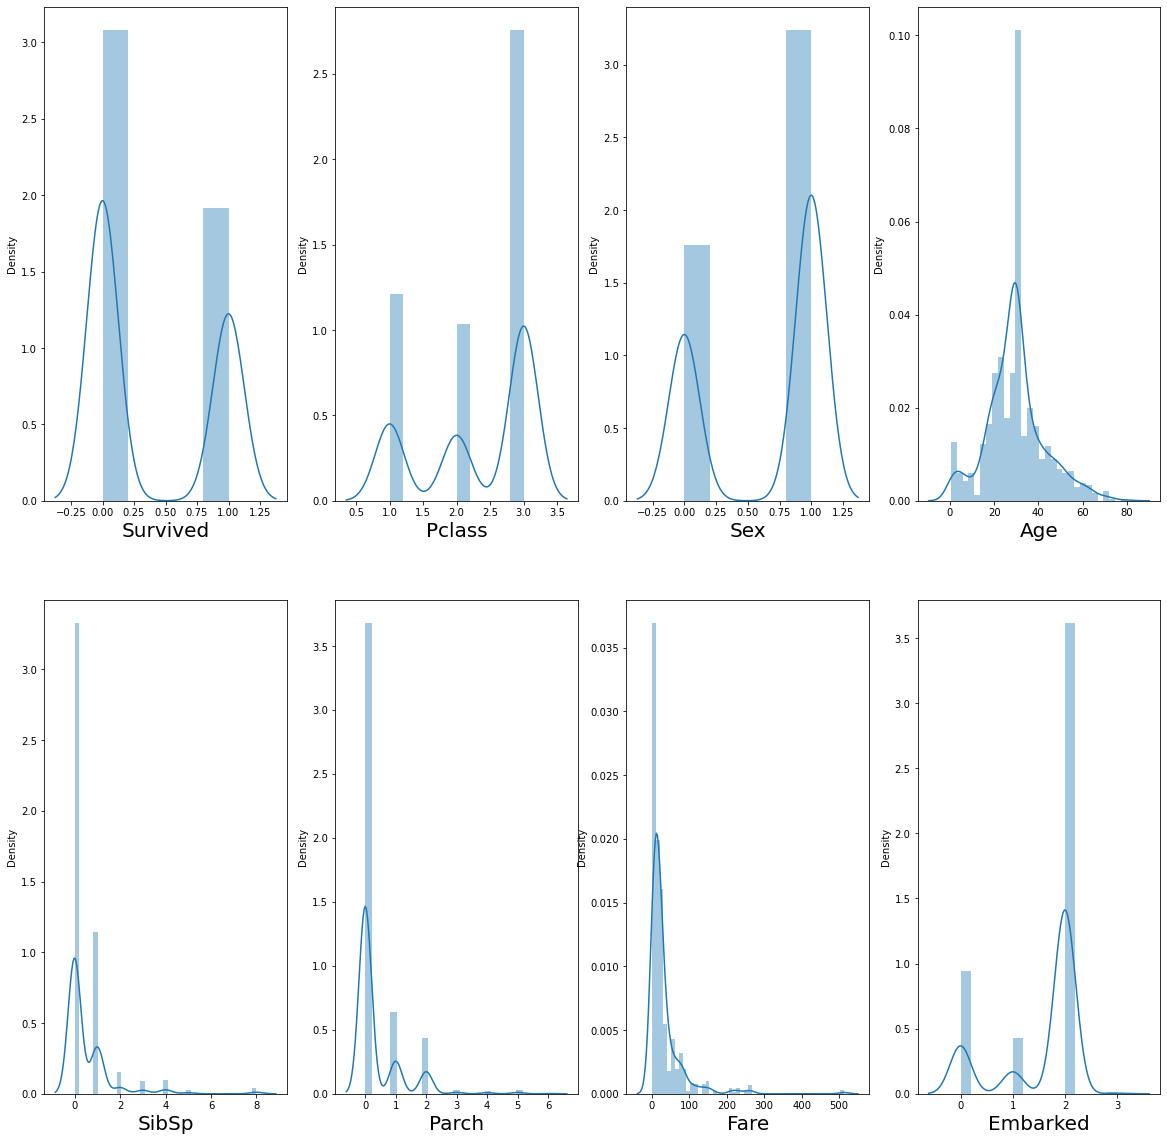

In [10]:
#lets see the data distribution for all the columns
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

the data looks skewed

In [11]:
#replace zeroes with their mean
data['Embarked']=data['Embarked'].replace(0,data['Embarked'].mean())
data['Parch']=data['Parch'].replace(0,data['Parch'].mean())
data['SibSp']=data['SibSp'].replace(0,data['SibSp'].mean())

now we have dealt with zeroes . now lets see the outliers

In [12]:
#split the data in independent and target variable
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [13]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1.000000,0.381594,7.2500,2.000000
1,1,0,38.000000,1.000000,0.381594,71.2833,1.538721
2,3,0,26.000000,0.523008,0.381594,7.9250,2.000000
3,1,0,35.000000,1.000000,0.381594,53.1000,2.000000
4,3,1,35.000000,0.523008,0.381594,8.0500,2.000000
...,...,...,...,...,...,...,...
886,2,1,27.000000,0.523008,0.381594,13.0000,2.000000
887,1,0,19.000000,0.523008,0.381594,30.0000,2.000000
888,3,0,29.699118,1.000000,2.000000,23.4500,2.000000
889,1,1,26.000000,0.523008,0.381594,30.0000,1.538721


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# checking outliers

<function matplotlib.pyplot.show(close=None, block=None)>

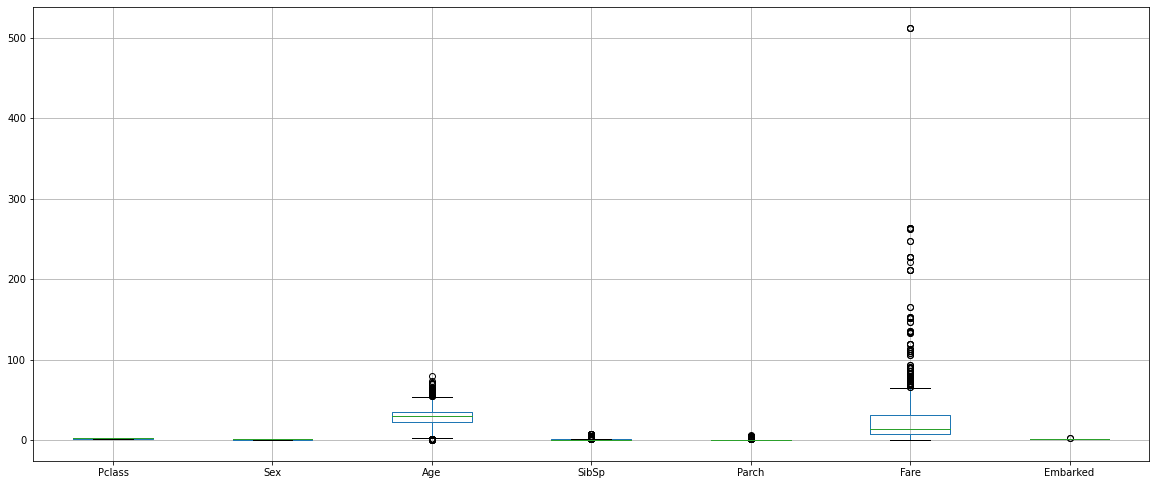

In [15]:
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show

In [16]:
#find the IQR (inter quantile range) to identify outliers

#1St quantile
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IOR
iqr=q3-q1

# OUTLIER DETECTION FORMULA

# higher side ==> Q3.column+(1.5*IQR)




# lower side ==> Q1.column-(1.5*IQR)

In [17]:
#validating one outlier
Age_high=(q3.Age+(1.5*iqr.Age))
Age_high

54.5

In [18]:
index=np.where(data['Age']>Age_high)
index

(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
        268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
        555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
        829, 851, 879], dtype=int64),)

In [19]:
data=data.drop(data.index[index])
data.shape

(849, 8)

In [20]:
data.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1.000000,0.381594,7.2500,2.000000
1,1,1,1,0,38.000000,1.000000,0.381594,71.2833,1.538721
2,2,1,3,0,26.000000,0.523008,0.381594,7.9250,2.000000
3,3,1,1,0,35.000000,1.000000,0.381594,53.1000,2.000000
4,4,0,3,1,35.000000,0.523008,0.381594,8.0500,2.000000
...,...,...,...,...,...,...,...,...,...
844,886,0,2,1,27.000000,0.523008,0.381594,13.0000,2.000000
845,887,1,1,0,19.000000,0.523008,0.381594,30.0000,2.000000
846,888,0,3,0,29.699118,1.000000,2.000000,23.4500,2.000000
847,889,1,1,1,26.000000,0.523008,0.381594,30.0000,1.538721


In [21]:
Fare_high=(q3.Age+(1.5*iqr.Fare))
Fare_high

index=np.where(data['Fare']>Fare_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1.000000,0.381594,7.2500,2.000000
1,2,1,3,0,26.000000,0.523008,0.381594,7.9250,2.000000
2,3,1,1,0,35.000000,1.000000,0.381594,53.1000,2.000000
3,4,0,3,1,35.000000,0.523008,0.381594,8.0500,2.000000
4,5,0,3,1,29.699118,0.523008,0.381594,8.4583,1.000000
...,...,...,...,...,...,...,...,...,...
749,886,0,2,1,27.000000,0.523008,0.381594,13.0000,2.000000
750,887,1,1,0,19.000000,0.523008,0.381594,30.0000,2.000000
751,888,0,3,0,29.699118,1.000000,2.000000,23.4500,2.000000
752,889,1,1,1,26.000000,0.523008,0.381594,30.0000,1.538721


In [22]:
Parch_high=(q3.Age+(1.5*iqr.Parch))
Parch_high

index=np.where(data['Parch']>Parch_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1.000000,0.381594,7.2500,2.000000
1,2,1,3,0,26.000000,0.523008,0.381594,7.9250,2.000000
2,3,1,1,0,35.000000,1.000000,0.381594,53.1000,2.000000
3,4,0,3,1,35.000000,0.523008,0.381594,8.0500,2.000000
4,5,0,3,1,29.699118,0.523008,0.381594,8.4583,1.000000
...,...,...,...,...,...,...,...,...,...
749,886,0,2,1,27.000000,0.523008,0.381594,13.0000,2.000000
750,887,1,1,0,19.000000,0.523008,0.381594,30.0000,2.000000
751,888,0,3,0,29.699118,1.000000,2.000000,23.4500,2.000000
752,889,1,1,1,26.000000,0.523008,0.381594,30.0000,1.538721


In [23]:
SibSp_high=(q3.Age+(1.5*iqr.SibSp))
SibSp_high

index=np.where(data['SibSp']>SibSp_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1.000000,0.381594,7.2500,2.000000
1,2,1,3,0,26.000000,0.523008,0.381594,7.9250,2.000000
2,3,1,1,0,35.000000,1.000000,0.381594,53.1000,2.000000
3,4,0,3,1,35.000000,0.523008,0.381594,8.0500,2.000000
4,5,0,3,1,29.699118,0.523008,0.381594,8.4583,1.000000
...,...,...,...,...,...,...,...,...,...
749,886,0,2,1,27.000000,0.523008,0.381594,13.0000,2.000000
750,887,1,1,0,19.000000,0.523008,0.381594,30.0000,2.000000
751,888,0,3,0,29.699118,1.000000,2.000000,23.4500,2.000000
752,889,1,1,1,26.000000,0.523008,0.381594,30.0000,1.538721


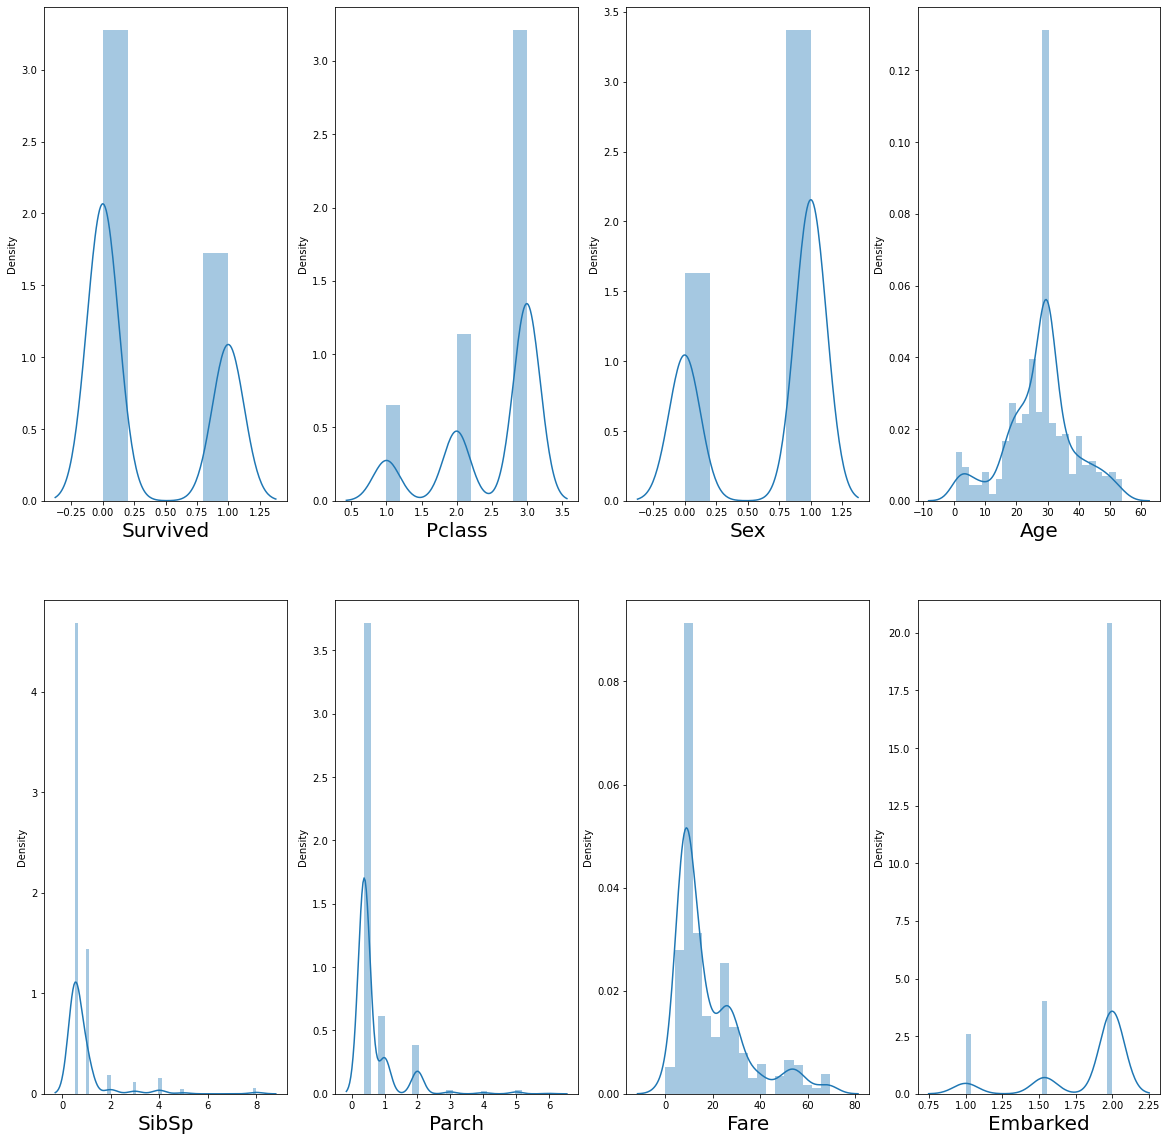

In [24]:
#lets see the data distribution for all the columns
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# checking correlation

In [25]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.279694,-0.494995,-0.106587,-0.079864,0.057544,0.218845,-0.095248
Pclass,-0.279694,1.000000,0.045877,-0.273155,0.134866,0.092521,-0.535819,-0.140018
Sex,-0.494995,0.045877,1.000000,0.099071,-0.090749,-0.269483,-0.160664,0.125357
Age,-0.106587,-0.273155,0.099071,1.000000,-0.255937,-0.154985,0.041622,0.029901
SibSp,-0.079864,0.134866,-0.090749,-0.255937,1.000000,0.375004,0.453806,0.061492
Parch,0.057544,0.092521,-0.269483,-0.154985,0.375004,1.000000,0.344695,0.067620
Fare,0.218845,-0.535819,-0.160664,0.041622,0.453806,0.344695,1.000000,0.098239
Embarked,-0.095248,-0.140018,0.125357,0.029901,0.061492,0.067620,0.098239,1.000000


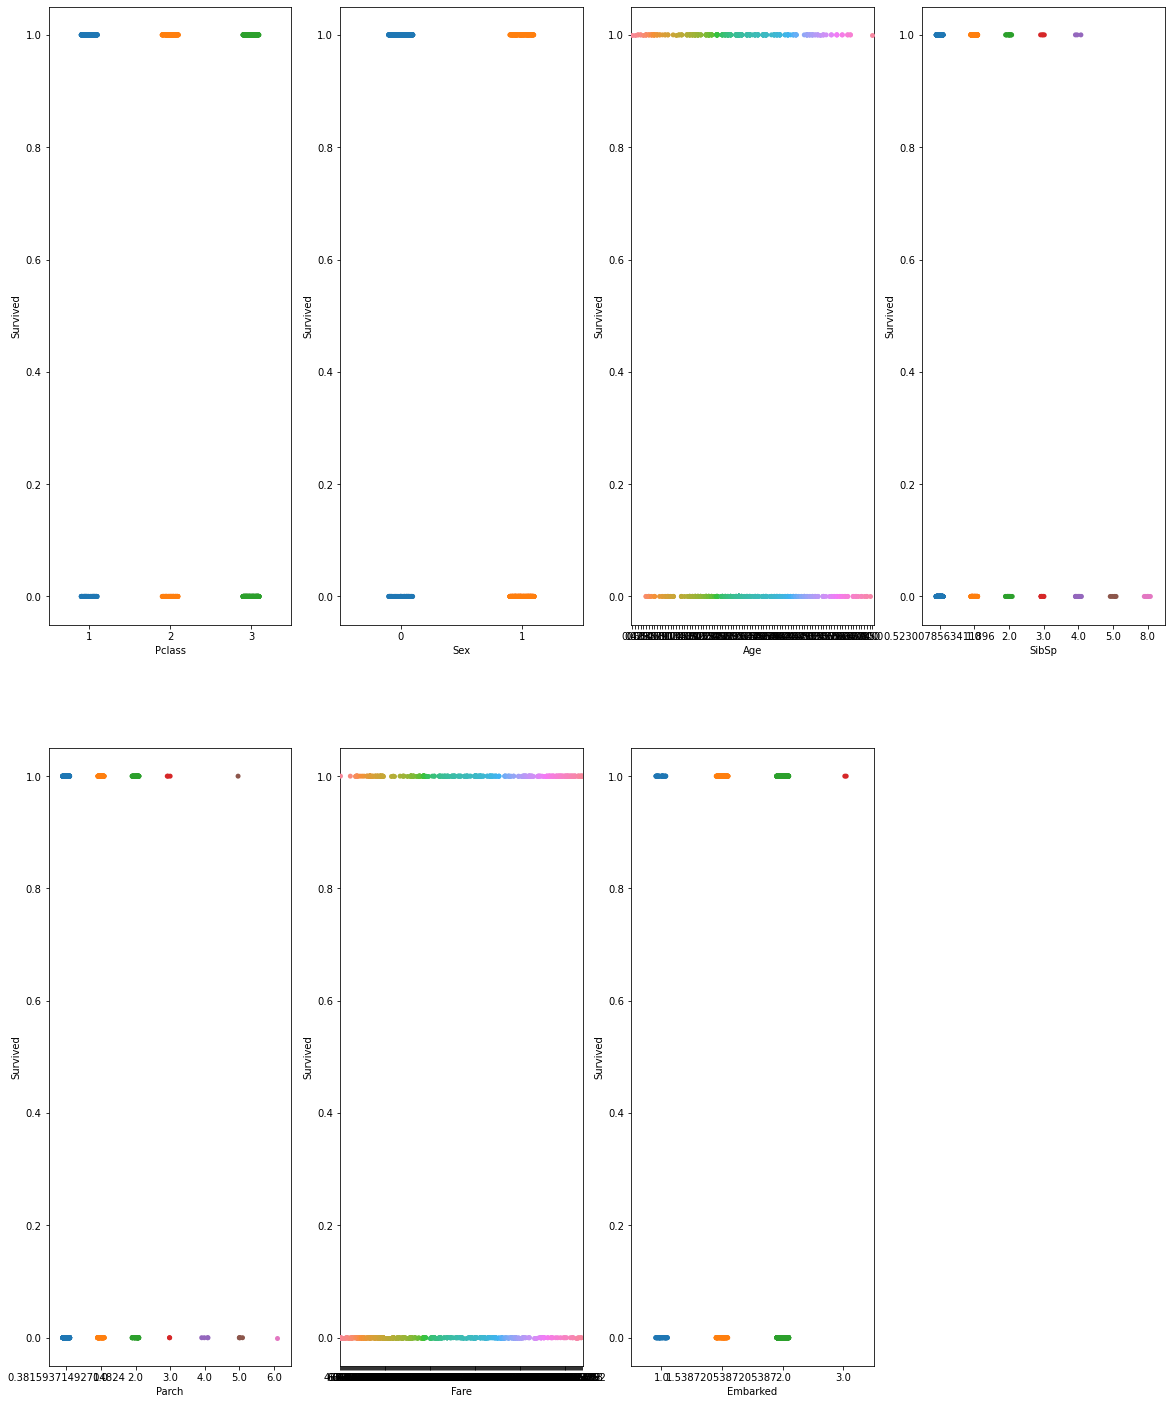

In [26]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.stripplot(x[column],y)
    plotnumber+=1
plt.show()

In [27]:
corr_mat=data.corr()
corr_mat["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.218845
Parch       0.057544
SibSp      -0.079864
Embarked   -0.095248
Age        -0.106587
Pclass     -0.279694
Sex        -0.494995
Name: Survived, dtype: float64

correlation is decent for all the columns

In [28]:
#chcking skewness
x.skew().sort_values()

Embarked   -1.486918
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Parch       3.463650
SibSp       4.718838
Fare        4.787317
dtype: float64


we can see skewness in most of the columns . we will remove the skewness using #power_transform

In [29]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [30]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.863973,0.737695,-0.556267,1.257834,-0.559487,-0.878820,0.520828
1,-1.459129,-1.355574,0.657269,1.257834,-0.559487,1.336651,-1.136504
2,0.863973,-1.355574,-0.241577,-0.671613,-0.559487,-0.790065,0.520828
3,-1.459129,-1.355574,0.437923,1.257834,-0.559487,1.067352,0.520828
4,0.863973,0.737695,0.437923,-0.671613,-0.559487,-0.774439,0.520828
...,...,...,...,...,...,...,...
886,-0.592604,0.737695,-0.164262,-0.671613,-0.559487,-0.294907,0.520828
887,-1.459129,-1.355574,-0.798775,-0.671613,-0.559487,0.527906,0.520828
888,0.863973,-1.355574,0.042001,1.257834,1.914372,0.288885,0.520828
889,-1.459129,0.737695,-0.241577,-0.671613,-0.559487,0.527906,-1.136504


In [31]:
#validating that the skewness has been removed or not
x.skew().sort_values()

Sex        -0.618921
Pclass     -0.441438
Fare       -0.040329
Age         0.064420
Embarked    0.586973
SibSp       0.893512
Parch       1.238474
dtype: float64

let's proceed by checking multicollinearity in the dependent variable . befor that we should scale our data. lets use standard scaler for that

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.86397329,  0.73769513, -0.55626693, ..., -0.55948675,
        -0.87882001,  0.52082775],
       [-1.45912855, -1.35557354,  0.65726854, ..., -0.55948675,
         1.33665056, -1.13650441],
       [ 0.86397329, -1.35557354, -0.24157742, ..., -0.55948675,
        -0.79006485,  0.52082775],
       ...,
       [ 0.86397329, -1.35557354,  0.04200106, ...,  1.91437247,
         0.28888536,  0.52082775],
       [-1.45912855,  0.73769513, -0.24157742, ..., -0.55948675,
         0.52790578, -1.13650441],
       [ 0.86397329,  0.73769513,  0.21525442, ..., -0.55948675,
        -0.81234947, -2.10687522]])

this is how our data looks like after new scaling. now we will check for multicollinearity using VIF(vatiance influence method)

In [33]:
x_scaled.shape[1]

7

In [34]:
#finding variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/(1-r2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [35]:
#lets check the values
vif

,vif,Features
0,1.952901,Pclass
1,1.123609,Sex
2,1.249637,Age
3,1.440696,SibSp
4,1.500933,Parch
5,2.331604,Fare
6,1.024742,Embarked


all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# Training Process

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [37]:
#finding best random state

maxAccu=0    #maximum accuracy
maxRS=0   #best random state value for which max accuracy is achived

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is :",maxAccu,"on Random state",maxRS)

best accuracy is : 0.8654708520179372 on Random state 150


we have found best random state value . now we will create our train_test_split using random_state

In [38]:
#cretaing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=150)

In [39]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
342,-0.592604,0.737695,-0.087442,-0.671613,-0.559487,-0.294907,0.520828
106,0.863973,-1.355574,-0.636431,-0.671613,-0.559487,-0.825304,0.520828
92,-1.459129,0.737695,1.228079,1.257834,-0.559487,1.197600,0.520828
548,0.863973,0.737695,0.289868,1.257834,1.670750,0.158270,0.520828
124,-1.459129,0.737695,1.781551,-0.671613,1.670750,1.409481,0.520828
...,...,...,...,...,...,...,...
496,-1.459129,-1.355574,1.781551,1.257834,-0.559487,1.420775,-1.136504
25,0.863973,-1.355574,0.657269,1.257834,1.936980,0.571395,0.520828
507,-1.459129,0.737695,0.042001,-0.671613,-0.559487,0.409788,0.520828
442,0.863973,0.737695,-0.319411,1.257834,-0.559487,-0.809136,0.520828


In [40]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
633,-1.459129,0.737695,0.042001,-0.671613,-0.559487,-3.534079,0.520828
489,0.863973,0.737695,-1.664721,1.257834,1.670750,-0.094229,0.520828
765,-1.459129,-1.355574,1.575821,1.257834,-0.559487,1.417234,0.520828
479,0.863973,-1.355574,-2.374696,-0.671613,1.670750,-0.351245,0.520828
285,0.863973,0.737695,0.289868,-0.671613,-0.559487,-0.701150,-1.136504
...,...,...,...,...,...,...,...
627,-1.459129,-1.355574,-0.636431,-0.671613,-0.559487,1.417234,0.520828
162,0.863973,0.737695,-0.241577,-0.671613,-0.559487,-0.809136,0.520828
756,0.863973,0.737695,-0.087442,-0.671613,-0.559487,-0.806470,0.520828
601,0.863973,0.737695,0.042001,-0.671613,-0.559487,-0.793750,0.520828


In [41]:
y_train

342    0
106    1
92     0
548    0
124    0
      ..
496    1
25     1
507    1
442    0
228    0
Name: Survived, Length: 668, dtype: int64

In [42]:
y_test

633    0
489    1
765    1
479    1
285    0
      ..
627    1
162    0
756    0
601    0
686    0
Name: Survived, Length: 223, dtype: int64

# LogisticRegression

In [43]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 86.54708520179372
[[121  13]
 [ 17  72]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       134
           1       0.85      0.81      0.83        89

    accuracy                           0.87       223
   macro avg       0.86      0.86      0.86       223
weighted avg       0.86      0.87      0.86       223



# DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 83.85650224215246
[[115  19]
 [ 17  72]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       134
           1       0.79      0.81      0.80        89

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.54708520179372
[[122  12]
 [ 18  71]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       134
           1       0.86      0.80      0.83        89

    accuracy                           0.87       223
   macro avg       0.86      0.85      0.86       223
weighted avg       0.87      0.87      0.86       223



# SVC(Support Vector Classifier)

In [55]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 86.54708520179372
[[128   6]
 [ 24  65]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       134
           1       0.92      0.73      0.81        89

    accuracy                           0.87       223
   macro avg       0.88      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



LogisticRegression,RandomForest and SVC are predicting good accuracy. now we will check cross validation score as well for overfitting



# Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of Logistic Regression model:",scr.mean())

Cross Validation score of Logistic Regression model: 0.794620551126734


In [57]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Random FOrest:",scr.mean())

Cross Validation score of Random FOrest: 0.8103446111355218


In [58]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation score of SVC:",scr.mean())

Cross Validation score of SVC: 0.8226602222082733


SVC is performing best among all so we will continue with SVC

# Hyper parameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [67]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [68]:
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       134
           1       0.93      0.76      0.84        89

    accuracy                           0.88       223
   macro avg       0.90      0.86      0.87       223
weighted avg       0.89      0.88      0.88       223



# ROC AUC plot

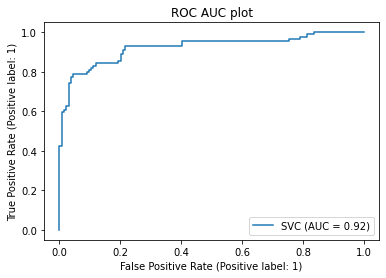

In [70]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

final accuracy is 88% and AUC score is 92% which is pretty good